# Intelligent Systems in Medical Imaging 2023

This Jupyter notebook is part of the course Intelligent Systems in Medical Imaging (ISMI) from Radboud University (Nijmegen, Netherlands), and it was developed by researchers of Radboud University Medical Center (Nijmegen, Netherlands).

You should have obtained this notebook by downloading it from the official Brightspace page of the course.

This notebook formulates an assignment as part of the ISMI course, and the content of this notebook should be used solely to develop a solution to this assignment. You should not make the code provided in this notebook, or your own solution, publicly available.

## Teaching Assistants

* Bram de Wilde (bram.dewilde@radboudumc.nl)
* Pierpaolo Vendittelli (pierpaolo.vendittelli@radboudumc.nl)
* Joeran Bosma (joeran.bosma@radboudumc.nl)
* Stephan Dooper (stephan.dooper@radboudumc.nl)

For questions about the assignments that go beyond the content, you can contact Bram de Wilde. Questions about the content are addressed in the tutorial sessions. You are also encouraged to use the Brightspace discussion forums to discuss content of the assignments. We will also keep an eye out there to help!

## Guidelines and instructions
Make sure you write code in any place that says "YOUR CODE HERE" by substituting `None` variables or by adding your own solution. Make sure you write in any place that says "YOUR ANSWER HERE" with your answers to the questions.

Please **do not delete or add any cells**.

Before you turn this problem in, make sure everything runs without errors. The easiest way to check this is to restart the kernel and run all cells (in the menubar, select Runtime$\rightarrow$Restart & Run All).

* Groups: You should work in **groups of 2 or 3 people**. (groups of 2 are preferred!)
* You are expected to work in Google Colab. If you run the notebooks locally, you may have to solve some issues yourself!
* Submit your **fully executed** notebook to Brightspace with file name format: `GroupN_NameSurname1_NameSurname2_NameSurname3.ipynb`
* The deadlines for all assignments are on Brightspace.
* Deadlines are soft, but make an effort to be on time. We prioritise feedback on assignments that are handed in before the deadline.
* Each assignment has 100 points, your grade is your total number of points divided by 10.
* The assignments are mandatory, but **do not count** towards your final grade for the course.
* For assignments where you have to submit to grand-challenge.org, use team name format `ismi-GroupN-nickname1`.
* When working with Google Colab, we advise you to download model checkpoints (.h5 files). This way you don't lose your checkpoint if your session times out. Also, don't forget to connect to a **GPU runtime** when training neural networks!
* In Google Colab, you can mount your Google Drive to save files, by clicking the Folder icon on the left, and then click the Mount Drive icon.

There are more detailed instructions on Brightspace on how to use Google Colab for the assignments. You can find it here: https://brightspace.ru.nl/d2l/le/content/333312/Home

## Students
Please fill in this cell with your names, e-mail address and s-numbers. This information will be used to grade your assignment.

* [Ivan Slootweg], [s1001424], [ilse.slootweg@ru.nl]
* [Elina Antonova], [s1057069], [elina.antonova@ru.nl]
* [Sven van der Post], [s1028679], [sven.vanderpost@ru.nl]

---------
# Vessel segmentation in retina fundus images
<img src="https://github.com/ivanslootweg/ISMI/blob/ivan/assignment_2/images/21_training.png?raw=1" width="250" height="250" align="right">
The goal of this assignment is to develop an algorithm for automatic segmentation of vessels in retina fundus images using 
feature classification and morphological filtering.



 
## Clinical background

Retinal vessel segmentation and delineation of morphological attributes of retinal blood vessels, such as length, width, tortuosity, branching patterns and angles are utilized for the diagnosis, screening, treatment, and evaluation of various cardiovascular and ophthalmologic diseases such as diabetes, hypertension, arteriosclerosis and chorodial neovascularization.

Automatic detection and analysis of the vasculature can assist in the implementation of screening programs for diabetic retinopathy, can aid research on the relationship between vessel tortuosity and hypertensive retinopathy, vessel diameter measurement in relation with diagnosis of hypertension, and computer-assisted laser surgery.

Automatic generation of retinal maps and extraction of branch points have been used for temporal or multimodal image registration, retinal image mosaic synthesis. Moreover, the retinal vascular tree is found to be unique for each individual and can be used for biometric identification.

## Data 

In this assignment, we are going to develop a system to automatically **segment vessels** in human retina fundus images. For this purpose, we are going to use data from the publicly available DRIVE dataset (http://www.isi.uu.nl/Research/Databases/DRIVE/).
The DRIVE dataset consists of 40 images, 20 used for training and 20 used for testing. Each case contains:
* a fundus (RGB) image
* a binary mask, which indicates the area of the image that has to be analyzed (removing black background)
* manual annotations of retinal vessels, provided as a binary map

## Tasks for this assignment
<img src="https://github.com/ivanslootweg/ISMI/blob/ivan/assignment_2/images/submission.png?raw=1" width="420" align="right">

1. Develop a system to segment vessels in retinal images in this notebook. You will have to submit this notebook with your code, which we will run and evaluate, together with the results of the segmentation. <br>

2. Use the training set provided with the DRIVE dataset to train/tune the parameters of your system. You cannot use data from the test set available on the DRIVE website, nor from other datasets. <br>

3. Apply it to the test dataset and generate a binary map of the segmented vessel. The map must have the same size as the input image. <br>

4. **Submit the results of your algorithm to the mini-challenge framework**. You can create a zip-file by running the corresponding cell at the end of the notebook. You will have to **submit** this zip-file to the mini-challenge framework (https://drive.grand-challenge.org/). In order to submit results, click on the **Submit** tab on grand-challenge, then click on the **Choose File** button to select your .zip "Predictions File" and submit it. You can monitor the execution of your submission by clicking on the link at the end of the page. Note that while grading your assignment, we will run your implementation and reproduce your results. Any significant discrepancy between the results submitted to the mini-challenge framework and the one computed using this notebook will be penalized and discussed with the student. **Note**: It is allowed to submit multiple times, checking the performance of different results of your algorithm. In order to keep track of your submissions, you can add a comment when you submit your .zip file. <br>
<font color='red'>
 <h3> Only submissions of teams will be accepted, and single users should not submit (unless they don't have a team). <br/><br/>

 The name of the team should have the format "ismi22-GroupN-nickname".<br/>
</h3>
</font>

5. Once you have completed your assignment, **submit the fully-executed notebook to Brightspace**. DO NOT submit the notebook to grand-challenge.<br>

## Implementation 

### First task: Max 80 pts
You will be asked to implement your vessel segmentation system based on **pixel classification based on texture analysis**.
For this purpose, you can use the following publications as reference:

* [1] M. Niemeijer et al. "Comparative study of retinal vessel segmentation methods on a new publicly available database"
* [2] Y. Yang et al., "An automatic hybrid method for retinal blood vessel extraction"
* [3] M.M. Fraz et al., "Blood vessel segmentation methodologies in retinal images - A survey"

The first paper explains how to segment retinal vessels using pixel classification.
In this assignment, you should implement the solution based on pixel classification as is explained in section 2.3.5 of the first paper.  

### Second task: Max 20 pts
Next, you could try to **improve the segmentation** result. The goal is to design the best CAD system for vessel segmentation and validate its performance on the DRIVE dataset! A few ideas to improve the system are:

* More features (Directional filters, local binary patterns, Gabor filters, etc.). Get creative!
* Postprocessing to improve the results using morphological filtering
* More training samples
* etc.

# Overview
A method based on texture analysis and pixel classification, requires a set of labeled samples, for which the correct label is known. We call this a *training set*. In order to build a training set, positive (vessel) and negative (non-vessel) samples have to be extracted from the images in the training set. This set will be used to classify new (test) samples, using for example a **nearest-neighbour** strategy for assigning labels. To objectively validate different methods, we will compare the results of your method with reference data (manual annotations). The outline of the approach you are about the implement is:
1. Load data: download the data, import and convert to numpy, inspect the available annotations.
2. Feature extraction: Implement texture analysis to extract features from the images and create a training set.
3. Train the classifier: for example a nearest-neighbour classifier.
4. Test the classifier: apply the classifier to new data to obtain a new vessel map.
5. Submit your results: submit the output of your algorithm to grand-challenge, where it will be evaluated and compared to other submissions.


## Step 1: Load data

Let's get started by importing libraries needed for this assignment:

In [ ]:
!pip3 install -q --upgrade ismi_utils
!pip install imagecodecs

  Using cached imagecodecs-2021.11.20-cp37-cp37m-win_amd64.whl (14.1 MB)


In [ ]:
import os
import shutil
import numpy as np
from PIL import Image
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier
import scipy.signal
from tqdm import tnrange
from tqdm.notebook import tqdm
import requests
import zipfile
import skimage.io
from ismi_utils import download_data

In [ ]:
'''Please insert here your teamname'''
TeamName = ''

Now, let's load the training data (images, masks and labels) into memory.

In [ ]:
assignment_name  = "assignment_2.zip"
download_data(assignment_name, link="https://surfdrive.surf.nl/files/index.php/s/Kn4hCF4G919ijr3/download")
data_folder = Path('./DRIVE')

100%|██████████| 28.0M/28.0M [00:03<00:00, 8.83MB/s]


Now that the data is on the machine you are using, you can continue working on this notebook.

In [ ]:
def get_file_list(path, ext=''):
    path = Path(path)
    return sorted(path.glob(f"*{ext}"))

def load_img(path):
    return skimage.io.imread(path)

train_img_files = get_file_list(data_folder / 'training' / 'images', '.tif')
train_msk_files = get_file_list(data_folder / 'training' / 'mask', '.gif')
train_lbl_files = get_file_list(data_folder / 'training' / '1st_manual', '.gif')

# train_img_files
train_imgs = [load_img(f) for f in train_img_files]
train_msks = [load_img(f) for f in train_msk_files]
train_lbls = [load_img(f) for f in train_lbl_files]

Let's define a function to visualize:
- The Image
- The fundus mask
- Manual annotation

Notice the use of the argument ```cmap``` to change the ```colormap``` of the visualization. 

In [ ]:
def show_image(img, msk, lbl):
    matplotlib.rcParams['figure.figsize'] = (20, 12)
    plt.subplot(1,3,1)
    plt.imshow(img)
    plt.title('RGB image')
    plt.subplot(1,3,2)
    plt.imshow(msk, cmap='gray')
    plt.title('Mask')
    plt.subplot(1,3,3)
    plt.imshow(lbl, cmap='gray')
    plt.title('Manual annotation')
    plt.show()

Show some images in the training set using the function defined above. Try setting a few values for ```i```.

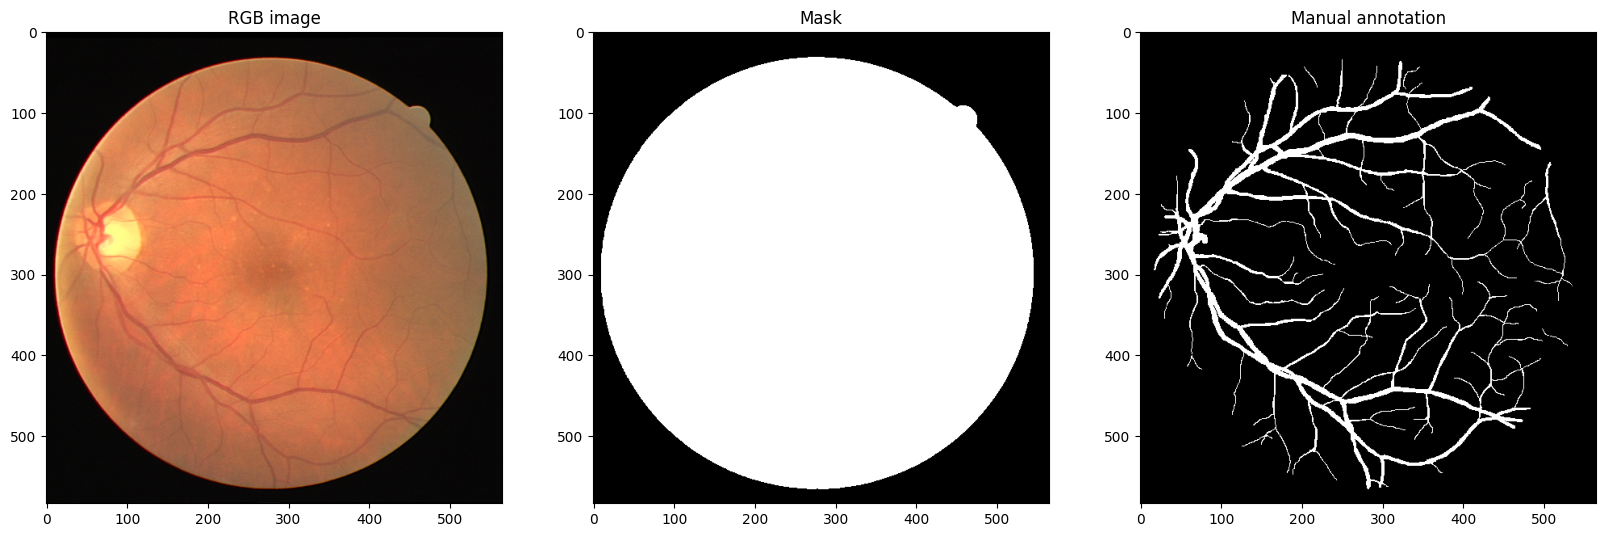

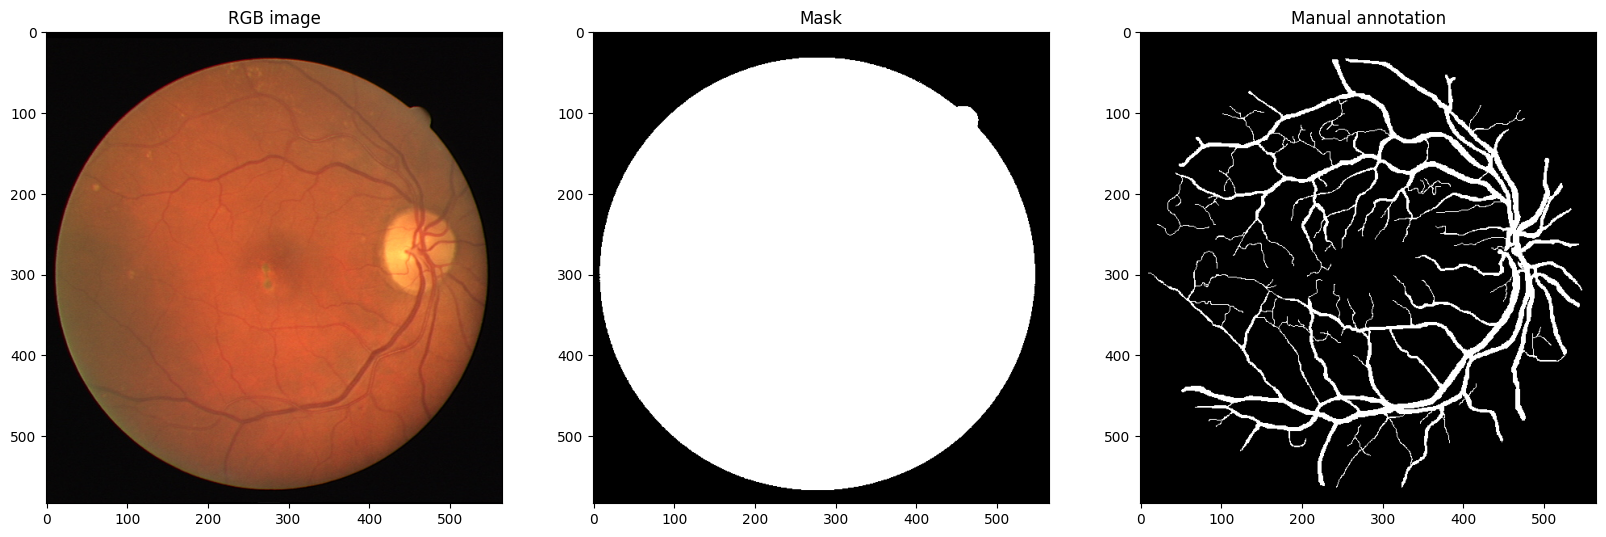

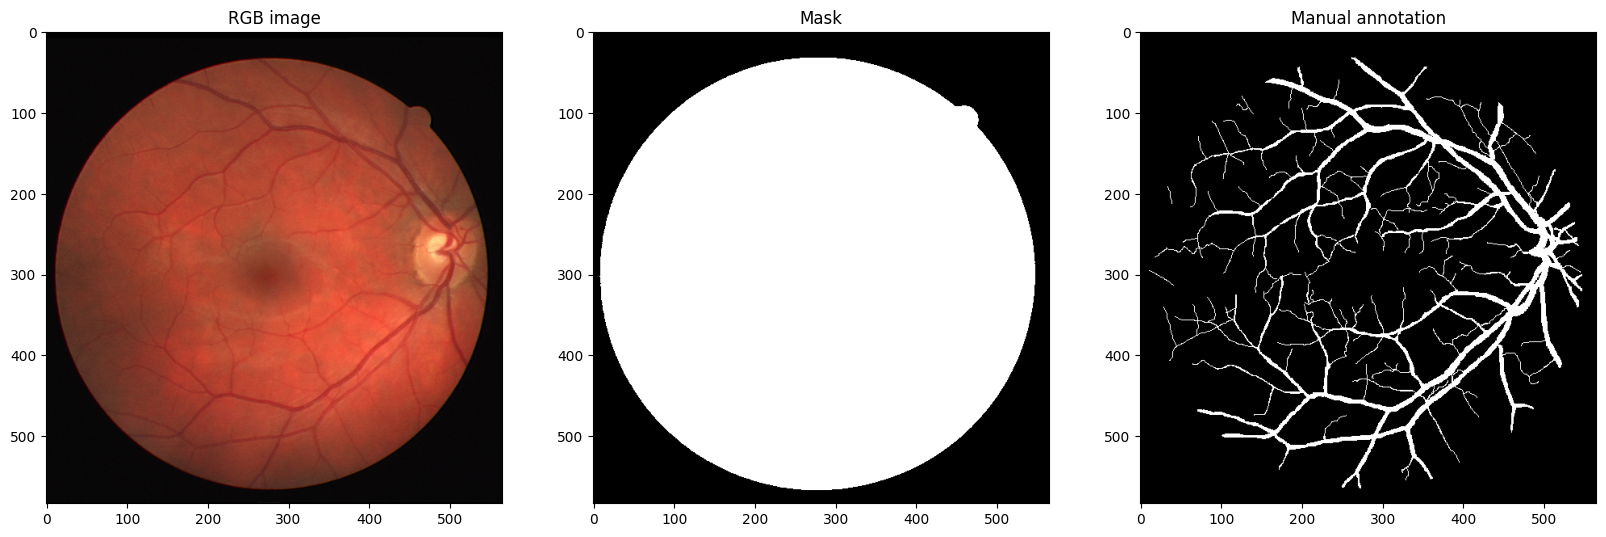

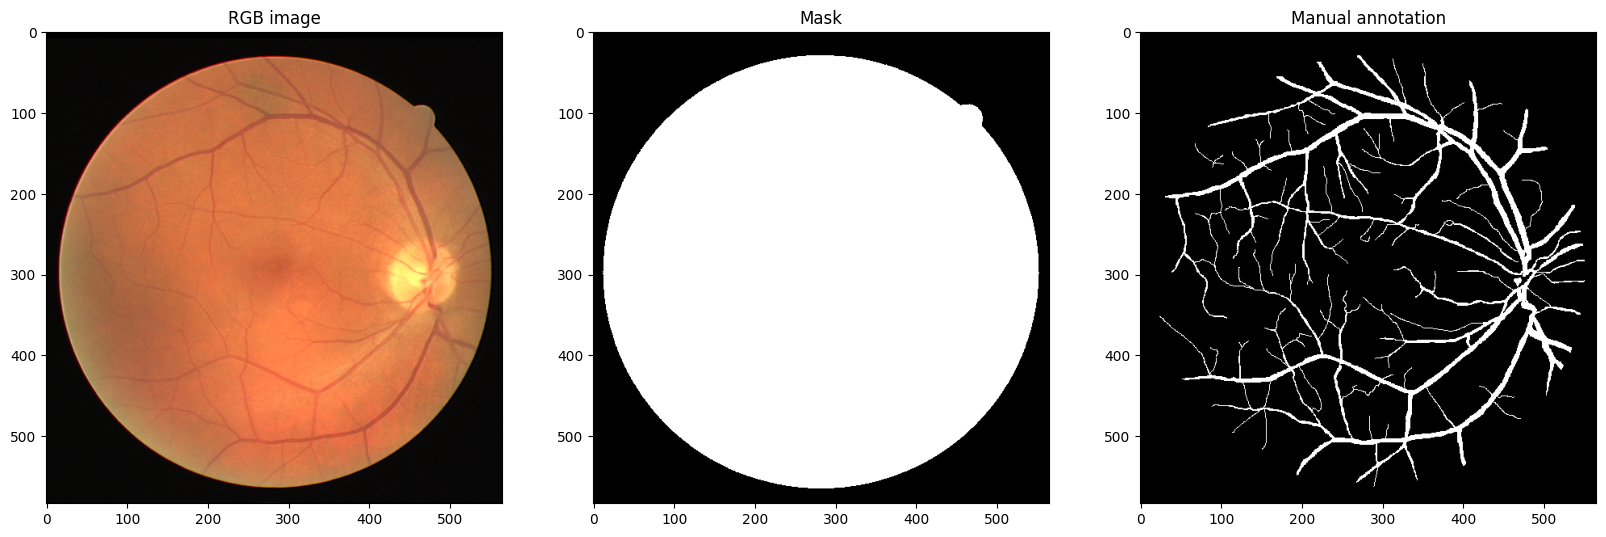

In [ ]:
for i in range(0,16,4): 
    show_image(train_imgs[i], train_msks[i], train_lbls[i])

## Step 2: Feature extraction

The system described in paper [1] uses filters based on Gaussian and derivative of Gaussian functions. Now we will create a two-dimensional Gaussian filter kernel that can be used the extract features from an image. 
If you completed the first assignment, you have implemented this function already, but let's re-write it so that we explicitly specify the kernel size.

In [ ]:
from scipy.spatial.transform import Rotation as R
def gaussian_2d(sigma, kernel_size=3, derivative_order = 0, derivative_axis = 0, rotation = None,LoG = False):
    """
    Computes a 2D Gaussian kernel with a given sigma (in pixels)
    The size of the kernel can be set as a multiple of the sigma (kernel_size*sigma)
    """
    x0, y0 = 0, 0
    sx = int(np.ceil(kernel_size * sigma))
    sy = int(np.ceil(kernel_size * sigma))
    x, y = np.meshgrid(np.arange(-sx, sx + 1), np.arange(-sy, sy + 1))
    
        
    exponent = (x**2 + y**2) / (2 * sigma**2)         
    kernel = np.exp(-exponent)
    
    if rotation != None:
    #     x = np.subtract(np.cos(rotation)*x, np.sin(rotation)*y)
    #     y = np.add(np.sin(rotation)*x, np.cos(rotation)*y)
    
    # if rotation != None:
    #     radians = np.radians(360-rotation)
    #     RotMatrix = np.array([[np.cos(radians),  np.sin(radians)],
    #                       [-np.sin(radians), np.cos(radians)]])
    #     XY = np.dot( RotMatrix,np.array([x.ravel(),y.ravel()]))
    #     x = XY[0,:].flatten()
    #     y = XY[1,:].flatten()
        
        r = R.from_rotvec(np.pi/4 * np.array([0, 0,1]))
        XY = np.array([x.ravel(),y.ravel(),kernel.ravel()]).transpose()
        XYrot = r.apply(XY)
        x = XYrot[:,0].reshape(x.shape)
        y = XYrot[:,1].reshape(y.shape)
        kernel - XYrot[:,2].reshape(kernel.shape)
        
        
        
    
    if LoG:
        LoGX = np.gradient(np.gradient(kernel,axis=0),axis=1)
        LoGY = np.gradient(np.gradient(kernel,axis=1),axis=0)
        kernel = -(np.add(LoGX, LoGY))

    if derivative_order > 0:
        for i in range(derivative_order):
            kernel = np.gradient(kernel,axis=derivative_axis)        

    return kernel, x, y


def visualize_gaussian_kernel(gaussian_kernel,elev = 30, azim = -60):
    ''' 
        Visualizes a Gaussian kernel
    '''    
    fig = plt.figure(figsize=(3, 3))
    ax = Axes3D(fig)
    ax.view_init(elev,azim)
    fig.add_axes(ax)
    y_dim, x_dim = gaussian_kernel.shape
    sx = x_dim // 2
    sy = y_dim // 2
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    x, y = np.meshgrid(range(-sx, sx + 1), range(-sy, sy + 1))
    ax.plot_surface(x, y, gaussian_kernel, rstride=1, cstride=1, cmap='jet')
    plt.show()

The `visualize_gaussian_kernel` function will help you create the Gaussian filter kernel by visualizing it in 3D. 
It will show the Gaussian filter kernel you defined in the function above.
Try changing sigma to see the kernel at different scales. With `size_sigma=3` you should be able to see the 'interesting' part of the gaussian function. It should look roughly like this (image from the first assignment): 

<img src="https://github.com/ivanslootweg/ISMI/blob/ivan/assignment_1/images/gaussian.gif?raw=1" width="400">

c:\Users\Ilse\Documents\Onderwijs\Master\ISMI\venvismi\lib\site-packages\ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


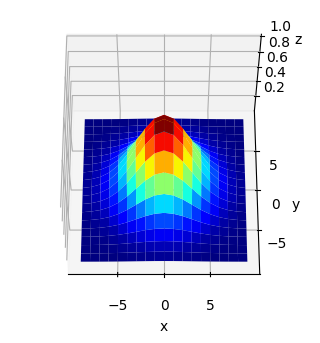

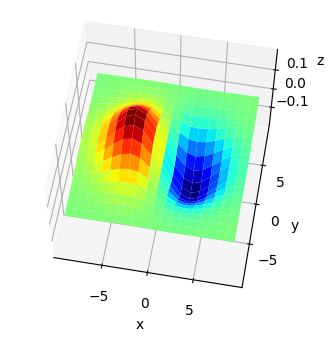

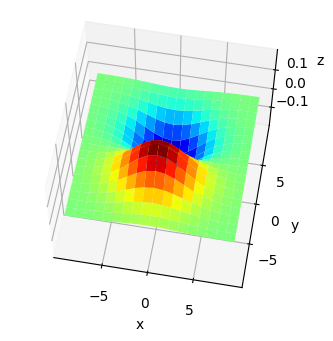

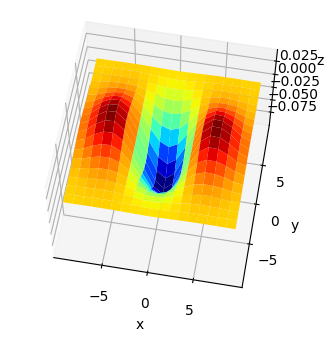

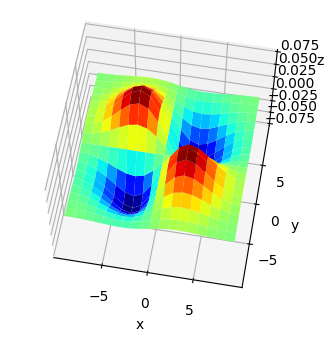

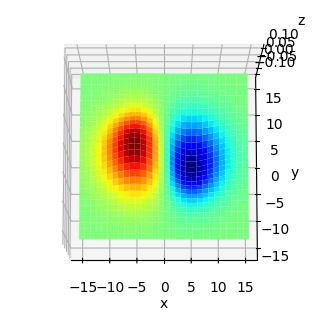

In [ ]:
sigma = 3 # Try some values here
kernel_size = 3
gaussian_kernel,_,_ = gaussian_2d(sigma,kernel_size)
visualize_gaussian_kernel(gaussian_kernel,azim =  270, elev = 60)


# first order of x
sigma = 3 # Try some values here
kernel_size = 3
gaussian_kernel,_,_ = gaussian_2d(sigma,kernel_size, derivative_order= 1, derivative_axis= 1)
visualize_gaussian_kernel(gaussian_kernel,azim =  280, elev = 60)

# first order of y
sigma = 3 # Try some values here
kernel_size = 3
gaussian_kernel,_,_ = gaussian_2d(sigma,kernel_size, derivative_order= 1, derivative_axis= 0)
visualize_gaussian_kernel(gaussian_kernel,azim =  280, elev = 60)


# second order, x
sigma = 3 # Try some values here
kernel_size = 3
gaussian_kernel,_,_ = gaussian_2d(sigma,kernel_size, derivative_order= 2, derivative_axis= 1)
visualize_gaussian_kernel(gaussian_kernel,azim =  280, elev = 60)


# LoG
sigma = 3 # Try some values here
kernel_size = 3
gaussian_kernel,_,_ = gaussian_2d(sigma,kernel_size, LoG=True)
visualize_gaussian_kernel(gaussian_kernel,azim =  280, elev = 60)


# first order, rotated
sigma = 5 # Try some values here
kernel_size = 3
gaussian_kernel,_,_ = gaussian_2d(sigma, kernel_size, derivative_order = 1,derivative_axis=1,rotation=45)
visualize_gaussian_kernel(gaussian_kernel,azim =  270, elev = 80)

### Collect features

Now you will implement a *feature extractor* that will extract features from an image. You will have to decide what filters, or texture analysis operators, will be used to describe the appearance of pixels. 

In order to define the number of features, consider the approach that you are going to implement. Base it specifically on paper [1] so keep in mind how many sigmas (and which) are you going to use!

Suggested features: 
- Gaussians at different scales
- Derivatives of Gaussians at different scales and angles
- Second derivatives at different scales and angles


Suggested functions to use:
 - ```gaussian_2d``` 
 - ```scipy.signal.fftconvolve```

Define your feature extraction function here:


In [ ]:
from 
def extract_features(img):
    """
        Computes features from a give input image.
        returns a Python list of feature maps (numpy arrays, the same size as the image)
        that contain the result of the convolution of each filter with the input image.
        
        As mentioned in the lecture, given the input image 'img', only the green channel
        is typically used in retina fundus image analysis. Therefore, the green channel
        is extracted, and you can use it as input for all subsequent steps in this function.
    """    
    img_green = img[:,:,1]
    # the first feature element is the green channel itself    
    features = [img_green]
    
    #for sigma 1,2,4,8,16
    #gaussian 
    #first order derivative gaussian
    #2nd order derivative gaussian
    #use zero mean
    
    for sigma in [1,2,4,8,16]:
        features.append()
    
    # YOUR CODE HERE
    i_index, j_index = features.shape
    
    for i in range(i_index):
        for j in range(j_index):
            
    
    return features

In [ ]:
"""DO NOT MODIFY THIS CELL"""


You can visualize the output of your feature extraction function here:

In [ ]:
n_img = 0  # select the image in the training set
img = train_imgs[n_img]
features = extract_features(img)
matplotlib.rcParams['figure.figsize'] = (2, 2)
for i, f in enumerate(features):
    print('Image {}'.format(i))
    plt.imshow(f, cmap='gray')
    plt.show()

**Question:** When implemented according to the paper, how many features does your `extract_features` function generate? Explain where these features come from.

YOUR ANSWER HERE

### Generate training data

We have read images, masks and manual annotations from the training set already:
* train_imgs (images)
* train_msks (masks)
* train_lbls (labels)

Now, we initialize the numpy arrays that will contain training **samples (x)** and corresponding training **labels (y)**. The matrix `x_train` will contain the features of each pixel in the training set, one sample per row, and one feature per column. The vector `y_train` will contain the corresponding label of each training sample. 

Pick a reasonable number for `n_samples_per_class_per_image`. More samples will likely result in better performance, but may make your method slow. 10 samples per class per image is probably the minimum you need for some indicative results if you want state of the art, you can take up to 2000 or more samples, but beware that this may result in long processing times.

In [ ]:
n_samples_per_class_per_image = None
n_classes = None
n_features = None

# YOUR CODE HERE

In [ ]:
"""DO NOT MODIFY THIS CELL"""

In [ ]:
vector_size = n_classes * n_samples_per_class_per_image * len(train_imgs)

# x_train will contain the vector of features, extracted at <vector_size> locations in the training set
x_train = np.zeros((vector_size, n_features))
# y_train will contain the corresponding labels
y_train = np.zeros(vector_size)

The following function is useful when you want to collect samples randomly selected from a given binary mask, for example when you want to obtain positive and negative samples from a segmentation map. In the case of vessel segmentation, this function can be used to obtain a given number of coordinates that contain pixels labeled as vessel or non-vessel. 

In [ ]:
def get_random_indices(array, n):
    '''
    returns n indices (as a tuple of x-coords and y-coords) where the array is True
    '''
    x, y = np.where(array)
    ixs = np.random.choice(len(x), size=n, replace=False)
    return x[ixs], y[ixs]

The following piece of code will loop through the images in the training set and extract features using the feature extractor you implemented. Next it will pick random locations (using the function above) in the image for background pixels and foreground pixels. 
Using these locations and the produced features you can now fill the numpy arrays `x_train` and `y_train` with a set of training samples (x) and corresponding training labels (y) to be used for training.
**Hint: think of features as a [height x width x features] matrix, so every x,y location contains a vector of features**

In [ ]:
def extract_training_data(train_imgs, train_lbls, train_msks, n_samples_per_class_per_image, n_classes):
    x_train = np.zeros((len(train_imgs) * n_samples_per_class_per_image * n_classes, len(extract_features(train_imgs[0]))))
    y_train = np.zeros(len(train_imgs) * n_samples_per_class_per_image * n_classes)

    for i, (img, lbl, msk) in enumerate(zip(train_imgs, train_lbls, train_msks)):
        # extract features from the given image
        features = extract_features(img)
        
        # make two boolean arrays, the same size as the image
        # positive_samples should be True at vessel pixels
        # negative_samples should be True at background pixels (but not outside the mask!)
        # You can use the numpy element wise logical operations 
        positive_samples = None
        negative_samples = None          
        # YOUR CODE HERE
        # extract indices for our set of samples
        p_idx = get_random_indices(positive_samples, n_samples_per_class_per_image)    
        n_idx = get_random_indices(negative_samples, n_samples_per_class_per_image) 
        
        # NOW:
        # extract positive and negative samples from the produced features and place them in x_train
        # create labels and place them in y_train
        # YOUR CODE HERE
        
    return x_train, y_train

x_train, y_train = extract_training_data(train_imgs, train_lbls, train_msks, n_samples_per_class_per_image, n_classes)

In [ ]:
"""DO NOT MODIFY THIS CELL"""

## Normalization

The samples obtained using the code above need to be normalized to obtain good performance. 
Implement a normalization function that will make sure the training dataset has **zero mean** and **unit variance** in the cell below.
The function should also return the mean and standard deviation of your training dataset. **Note**: a division by ```zero``` may cause some numerical problems...

In [ ]:
def normalization(x_train):
    '''
        apply normalization to the samples (x_train)
        returns a new array that has been properly normalized, 
        also returns the mean and standard deviation per feature in the training set 
    ''' 
    
    
    x_train_normalized = None # array of normalized features
    mean = None # array of mean value per feature 
    std = None # array of std value per feature
       
    
    # YOUR CODE HERE
    return x_train_normalized, mean, std

In [ ]:
x_train_normalized, train_mean, train_std = normalization(x_train)

In [ ]:
"""DO NOT MODIFY THIS CELL"""

# Step 3: Train the classifier
Now that you have created the training data we can use it to train our classifier!
The classifier that we have seen in the lecture is k-Nearest Neighbors (kNN).
You can use that one, which is available in the ```sklearn``` library (imported at the beginning of this notebook).
Pick a meaningful value for ```k``` (the number of neighbors).

You will notice that kNN is a **slow** algorithm when you apply it to new data.
We propose using it because it is the only one we have seen so far.
But if you know other classifiers thath you want to use in this assignment, feel free to do it!

In [ ]:
n_neighbors = None

# YOUR CODE HERE



classifier = KNeighborsClassifier(n_neighbors=n_neighbors) 
classifier.fit(x_train_normalized, y_train)

In [ ]:
"""DO NOT MODIFY THIS CELL"""

# Step 4: Test the classifier
Now that we have a trained classifier we can apply it to some unseen data and evaluate its performance.
First we load the test data (note that labels for test data are not available now!):

In [ ]:
test_img_files = get_file_list(data_folder / 'test' / 'images', '.tif')
test_msk_files = get_file_list(data_folder / 'test' / 'mask', '.gif')

test_imgs = [load_img(f) for f in test_img_files]
test_msks = [load_img(f) for f in test_msk_files]

**Question:** What step is crucial in ensuring that the distributions of the training set and test set do not vary greatly in machine learning?

**Question:** How would you perform this step on the test set?

YOUR ANSWER HERE

In [ ]:
test_mean = None
test_std = None

# YOUR CODE HERE



In [ ]:
"""DO NOT MODIFY THIS CELL"""

In [ ]:
def normalization_test(x_test):
    '''
    Normalization of the test data
    ''' 
    return (x_test - test_mean) / test_std 

The next function will classify a new, unseen image using our classifier. It will:

* Extract features for every pixel in the image
* Apply normalization
* Classify every pixel
* Put the pixels back in the shape of the original image

In [ ]:
def classify_img(classifier, img, msk, threshold):

    # compute features
    print('extraction features')
    features = extract_features(img) 
    print('features extracted')

    h, w, c = img.shape
    # reshape the features to an array of feature vectors
    x_test = np.moveaxis(np.array(features), 0, 2).reshape((h * w, -1))
    # normalize the features
    x_test_normalized = normalization_test(x_test)

    print('classifying pixels with nearest-neighbor')
    p_test = classifier.predict_proba(x_test_normalized)
    print('classification done')

    # reshape to image format, set pixels outside the mask to zero
    p_test_reshaped = p_test[:,1].reshape(h, w) * msk

    # Threshold the probabilitymap to obtain the final result
    final_output = (p_test_reshaped > threshold) * 255 
    
    # return the raw output and the thresholded image
    return p_test_reshaped, final_output


We loop over all the images in the test set and do the following for every image:
* classify all pixels, using the above defined `classify_img` function
* plot the results
* save the thresholded output image as a png file

In [ ]:
# First, we will set the folder where the results will be saved
# feel free to modify this location (if you wish not to overwrite previous results)
result_output_folder = 'vessel_segmentation_results'

result_output_folder = Path(result_output_folder)

if not result_output_folder.exists():
    result_output_folder.mkdir(parents=True)

In [ ]:
# optimize this parameter (values 0-255)
optimal_threshold = 128

for i, (img, msk) in enumerate(zip(test_imgs, test_msks)):
    print('processing image:', i)
    raw_output, final_output = classify_img(classifier, img, msk, optimal_threshold)

    # plot the results
    matplotlib.rcParams['figure.figsize'] = (10, 6)
    plt.subplot(1, 3, 1).set_title('Input Img')
    plt.imshow(img)
    plt.subplot(1, 3, 2).set_title('Raw output')
    plt.imshow(raw_output)
    plt.subplot(1, 3, 3).set_title('Final Output')
    plt.imshow(final_output)
    plt.show()

    # save the image as png file
    im = Image.fromarray(final_output.astype('uint8'))
    im.save(os.path.join(result_output_folder, "{}.png".format(i + 1)))

**Question:** What is the output of your kNN classifier? Did you obtain a label for each pixel? How is that label computed?


YOUR ANSWER HERE

# Step 5: Submit your results!

After processing all the images in the test set you can execute the cell below to create a zip-file of the images with the segmentation results.

In [ ]:
shutil.make_archive('results', 'zip', result_output_folder)

You can now download this zipfile `results.zip` from the file explorer on the left.
Next, upload your result to the challenge website (https://drive.grand-challenge.org/evaluation/submissions/create/) and see how well you performed compared to your fellow students! You can submit as often as you want, only the best result counts.  

# Second task (20 points)
### Improve your results!

Try to improve your results and resubmit.

A few ideas to improve the system are:

* Change the threshold
* More training samples
* Different classifier (if you know any)
* More features (Directional filters, local binary patterns, Gabor filters, get creative!
* Postprocessing to improve the results (morphological operations), for example remove the rim around the field of view (which is obviously not part of a vessel), remove noise, etc.

In [ ]:
# Use these cells to write improve your solution, please do not add new cells!